<h1>Digit Classification</h1>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from yellowbrick.classifier import ClassificationReport, ConfusionMatrix, ROCAUC, ClassBalance

<h2>Loading the data</h2>

<ul>
<li>We use panda's read_csv to read train.csv into a dataframe</li>
<li>Separate our images and labels for supervised learning.</li>
<li>Use train_test_split to break data into sets for training and testing</li>
</ul>

In [2]:
labeled_images = pd.read_csv('train.csv')
images = labeled_images.iloc[0:10000,1:].as_matrix()
labels = labeled_images.iloc[0:10000,:1].as_matrix()
labels = np.ravel(labels)
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, train_size=0.75, test_size=0.25, random_state=42)

<h4>Viewing an image</h4>

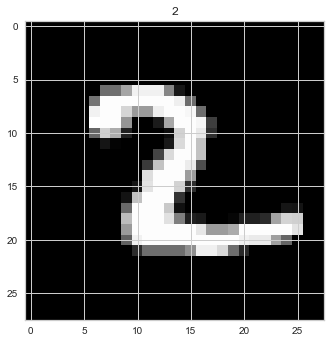

In [3]:
i = 5000
img = train_images[i]
img=img.reshape((28,28))
plt.imshow(img, cmap='gray')
plt.title(train_labels[i])

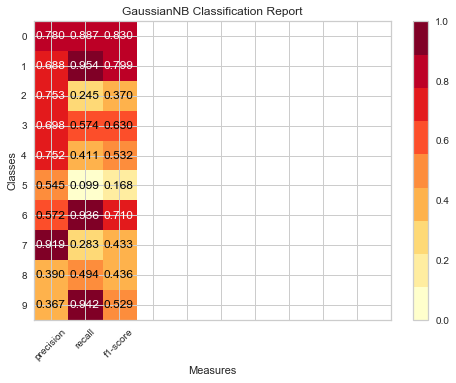

In [4]:
bayes = GaussianNB()
classes = [0,1,2,3,4,5,6,7,8,9]
visualizer = ClassificationReport(bayes, classes=classes)

visualizer.fit(train_images, train_labels)
visualizer.score(test_images, test_labels)
g = visualizer.poof()

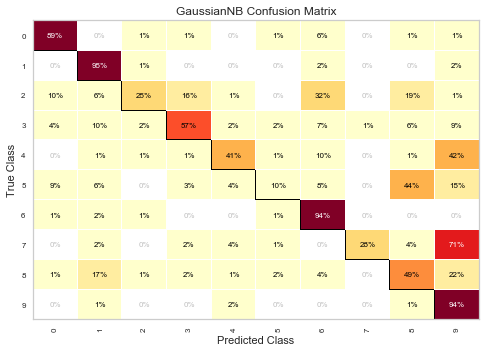

In [5]:
bayes = GaussianNB()
visualizer = ConfusionMatrix(bayes)

visualizer.fit(train_images, train_labels)
visualizer.score(test_images, test_labels)
g = visualizer.poof()

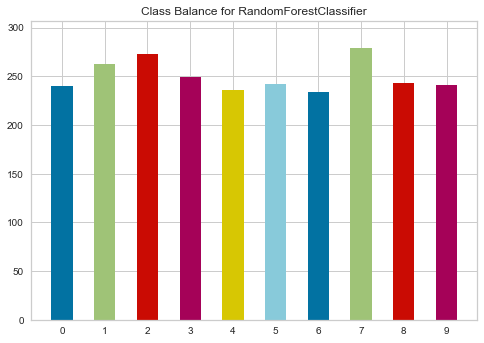

In [6]:
forest = RandomForestClassifier()
visualizer = ClassBalance(forest, classes=classes)

visualizer.fit(train_images, train_labels)
visualizer.score(test_images, test_labels)
g = visualizer.poof()